In [309]:
import pandas as pd
df = pd.read_csv('cleaned.csv')


In [310]:
place = {1:'home',2:'office',3:'out of town'}
department = {1:'cleaners',2:'HR',3:'IT',4:'marketing',5:'R&D',6:'finance',7:'operations'}
designation = {1:'ad-hoc',2:'employee',3:'foreman',4:'manager',5:'supervisor'}
leave_type = {1:'casual',2:'earned',3:'EOL',4:'official',5:'medical',6:'extension leave'}
reason = {1:'death',2:'marriage',3:'medical',4:'emergency for family',5:'accompany child',
          6:'duty leave',7:'personal'}


In [311]:
import random 
import pandas as pd
dataframe = pd.DataFrame(columns=['number of days','applied leaves per month',
                                  'place','department','designation','leave_type','reason'])

for i in range(1):
    x = random.randint(1,30)
    y = random.randint(0,5)
    a = place[random.randint(1,3)]
    b = department[random.randint(1,7)]
    c = designation[random.randint(1,5)]
    d = leave_type[random.randint(1,6)]
    e = reason[random.randint(1,7)]
    dataframe.loc[i]=[x,y,a,b,c,d,e]

print(dataframe.shape)

(1, 7)


In [312]:
df = pd.read_csv('Second data file--with status --1.csv')
df = df.drop('Unnamed: 8',axis=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score


def fun(x):
    y={}
    for i in x.keys():
        y[x[i]]= i
    return y

df['place'] = df['place'].apply(lambda x:fun(place)[x])
df['department'] = df['department'].apply(lambda x:fun(department)[x])
df['leave_type'] = df['leave_type'].apply(lambda x:fun(leave_type)[x])
df['reason'] = df['reason'].apply(lambda x:fun(reason)[x])
df['designation'] = df['designation'].apply(lambda x:fun(designation)[x])
df['Status'] = df['Status'].apply(lambda x:0 if x=='Rejection' else 1)


In [313]:
y = df.Status
x = df.drop('Status',axis=1)
from imblearn.over_sampling import SMOTE
smote = SMOTE()


x_train,x_test,y_train,y_test=train_test_split(x,y)

#sample = smote.fit_resample(x_train,y_train)

#x_train = sample[0]
#y_train = sample[1]

tree = DecisionTreeClassifier('gini')
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
accuracy_score(y_pred,y_test)

0.796

In [314]:
f1_score(y_pred,y_test)

0.5984251968503937

In [315]:

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'
features=x_train.columns

# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("baby model.pdf")


True

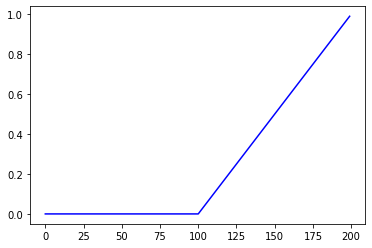